In [1]:
pip install statsmodels



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv("data.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
d=data[0:0]
d2=data.iloc[0:3,0:2]
#    column_range , column_number
print(d2)
# for dl in d:
#     data[dl].unique()
#     print(dl, data[dl].unique())


           Brand    Price
0            BMW   4200.0
1  Mercedes-Benz   7900.0
2  Mercedes-Benz  13300.0


In [8]:
data["Price"].fillna(data["Price"].mean(),inplace=True)


/var/folders/x5/pw1k_2d12jbfrsn2m_cr91_40000gn/T/ipykernel_37639/726221492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Price"].fillna(data["Price"].mean(),inplace=True)


In [9]:
data["EngineV"].fillna(data["EngineV"].mean(),inplace=True)

/var/folders/x5/pw1k_2d12jbfrsn2m_cr91_40000gn/T/ipykernel_37639/2192086902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["EngineV"].fillna(data["EngineV"].mean(),inplace=True)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4345 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4345 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [11]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

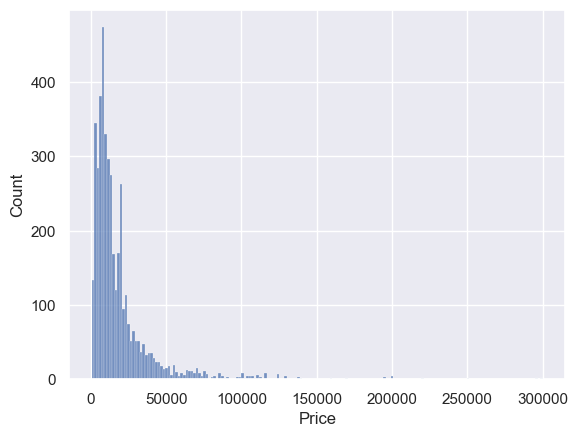

In [12]:
sns.histplot(data["Price"])

62979.20000000002


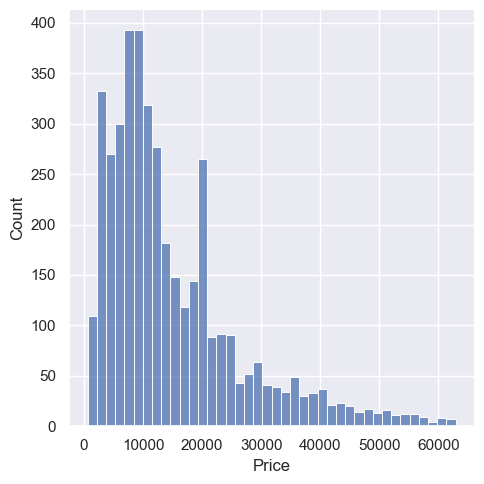

In [13]:
q = data['Price'].quantile(0.95)
print(q)
data = data[data['Price']<q]
sns.displot(data['Price'])


In [14]:
data["Price"].describe()

count     4127.000000
mean     14909.674735
std      11669.624425
min        600.000000
25%       6900.000000
50%      11300.000000
75%      19418.746935
max      62900.000000
Name: Price, dtype: float64

2600.0


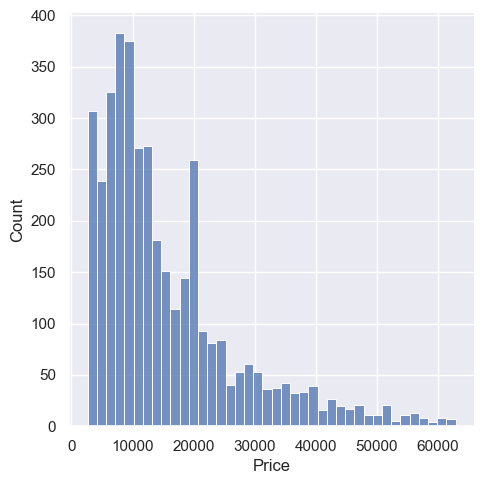

In [15]:
q2=data["Price"].quantile(0.05)
print(q2)
data = data[data['Price']<q]
data = data[data['Price']>q2]
sns.displot(data['Price'])

In [16]:
data["Price"].describe()

count     3906.000000
mean     15637.723959
std      11574.739474
min       2650.000000
25%       7500.000000
50%      11900.000000
75%      19418.746935
max      62900.000000
Name: Price, dtype: float64

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model]
Index: []


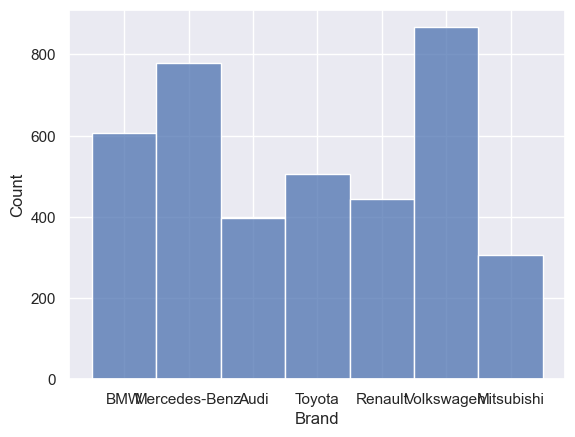

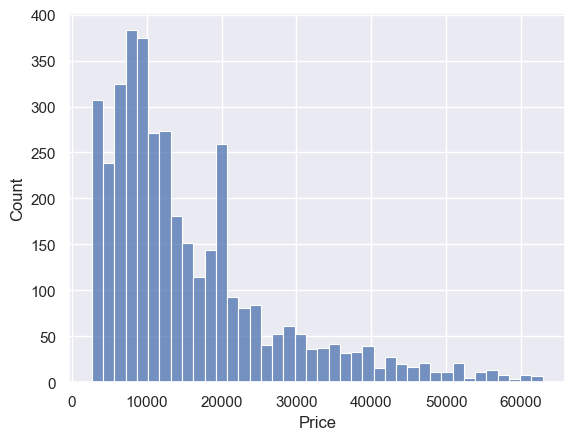

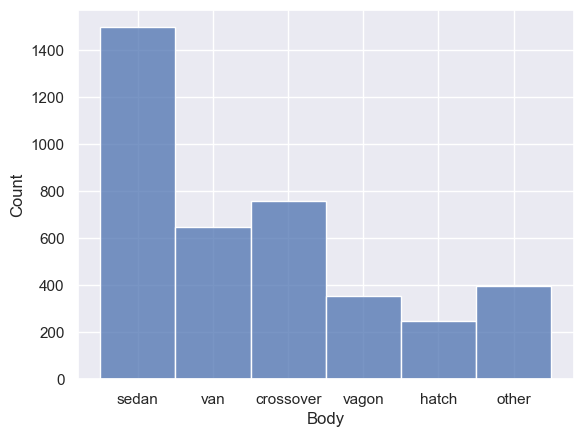

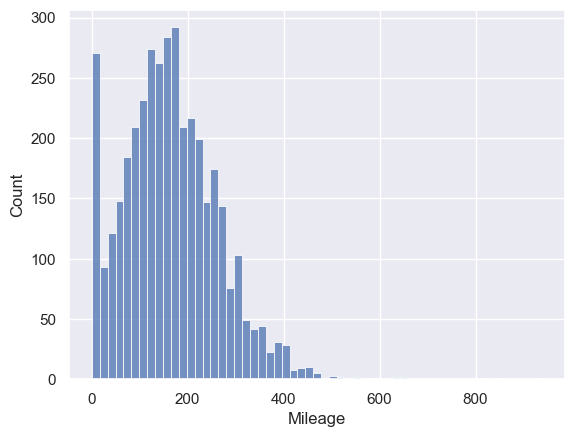

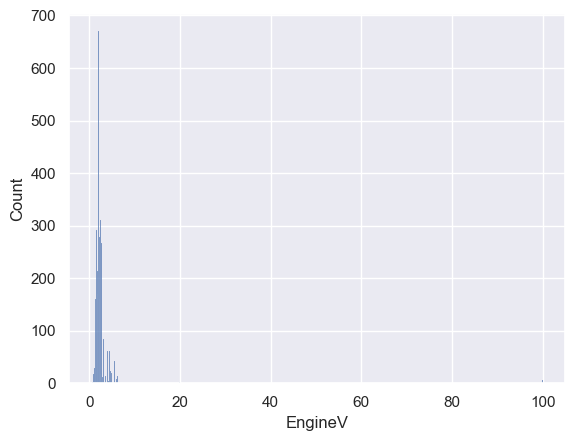

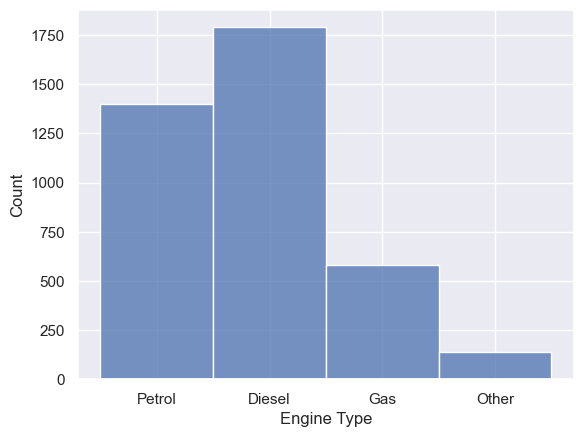

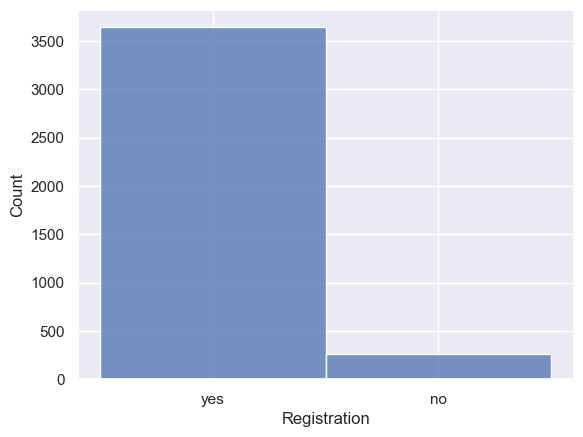

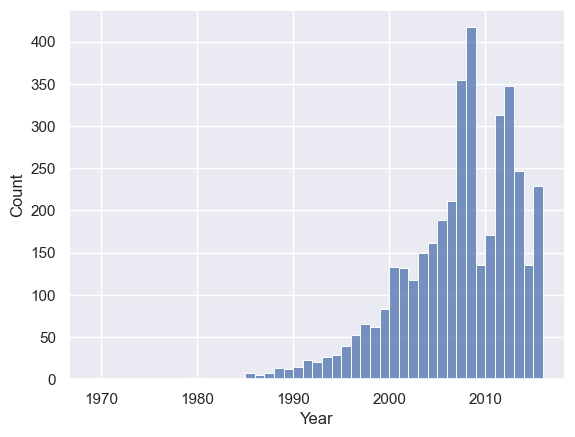

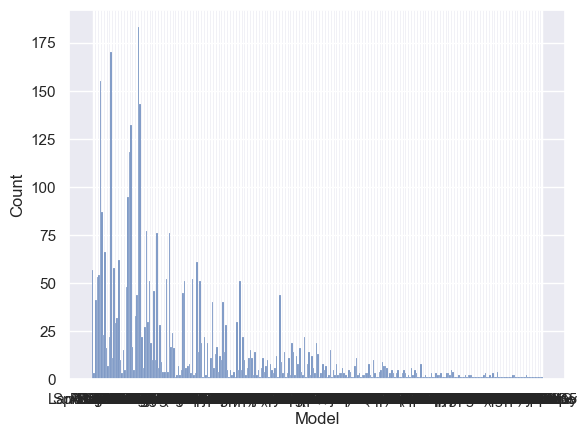

In [17]:
d=data[0:0]
print(d)
for dl in d:
    sns.histplot(data[dl])
    plt.show()

In [18]:
data["Mileage"].describe()

count    3906.000000
mean      164.499744
std       100.396472
min         0.000000
25%        95.000000
50%       158.000000
75%       225.000000
max       940.000000
Name: Mileage, dtype: float64

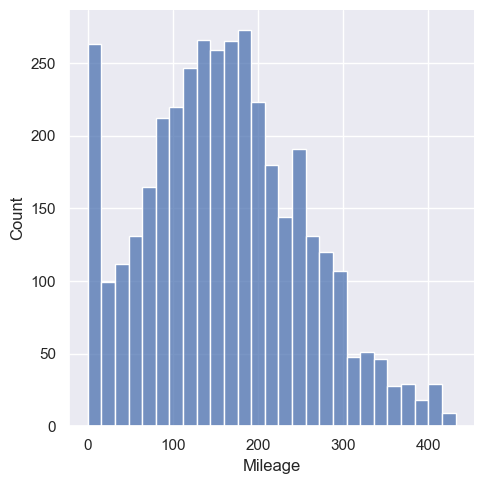

In [19]:
q3=data["Mileage"].quantile(0.99)
data = data[data['Mileage']<q3]
data["Mileage"].describe()
sns.displot(data["Mileage"])

In [20]:
data["EngineV"].describe()


count    3866.000000
mean        2.759769
std         5.016767
min         0.600000
25%         1.900000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

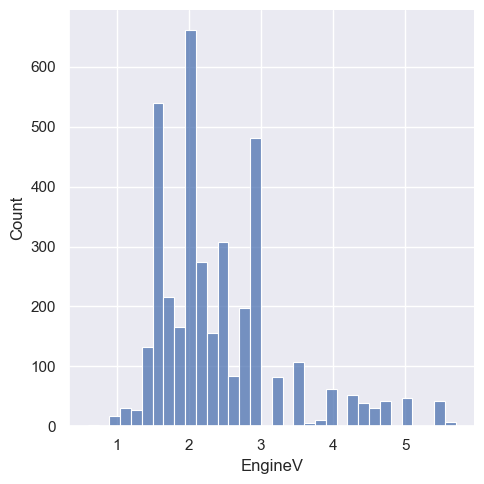

In [21]:
q4=data["EngineV"].quantile(0.99)
data = data[data['EngineV']<q4]
data["EngineV"].describe()
sns.displot(data["EngineV"])

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model]
Index: []


<Figure size 1000x600 with 0 Axes>

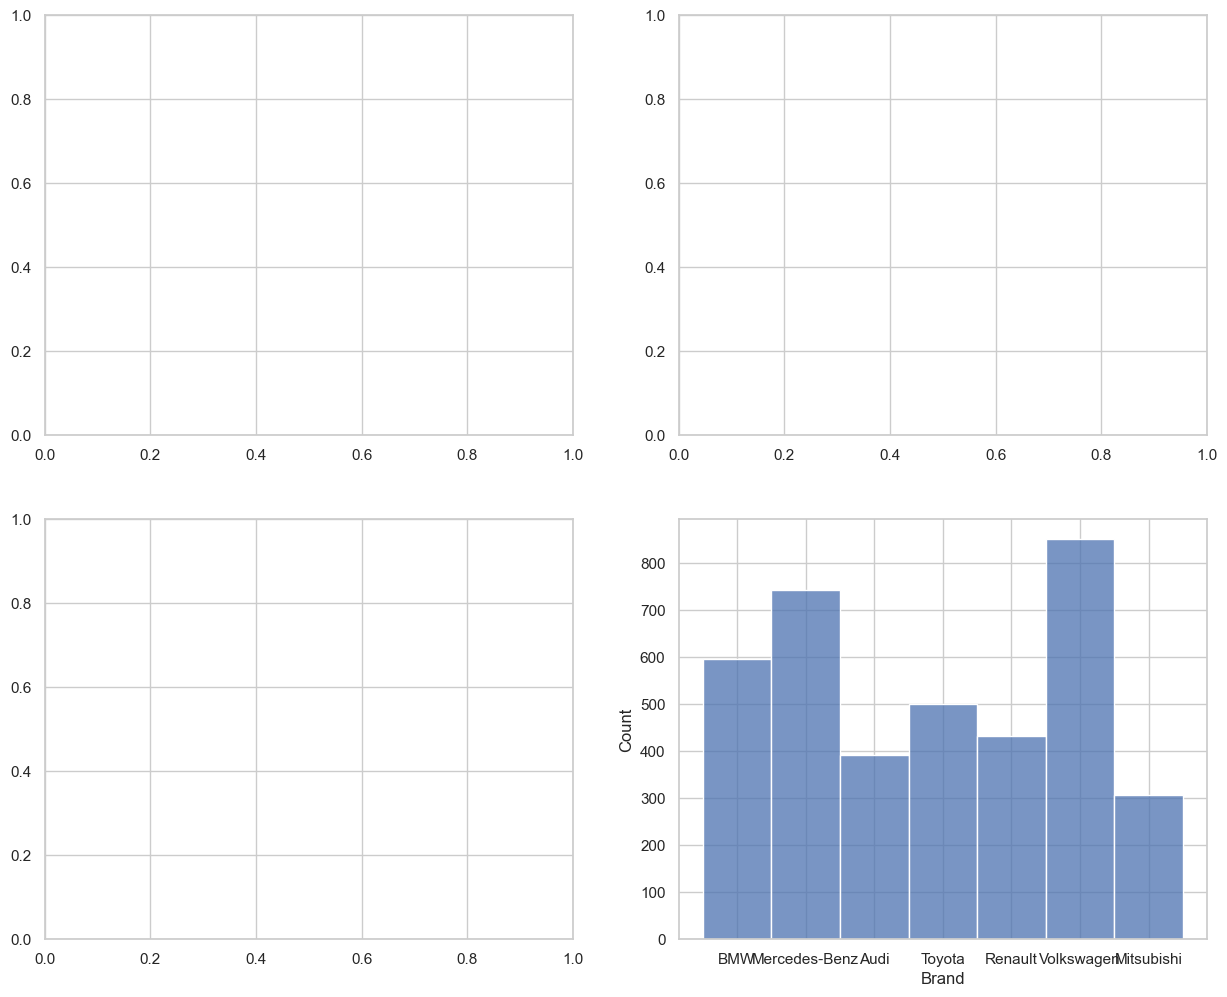

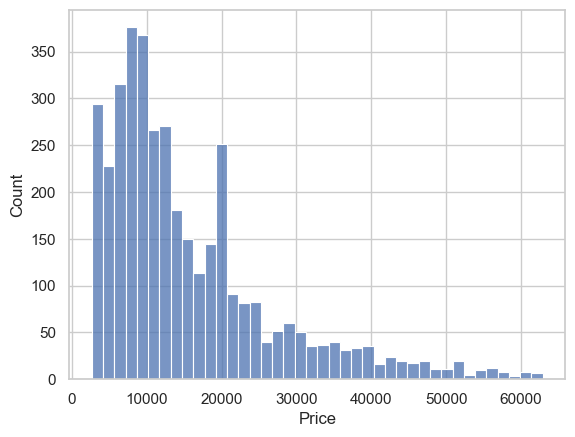

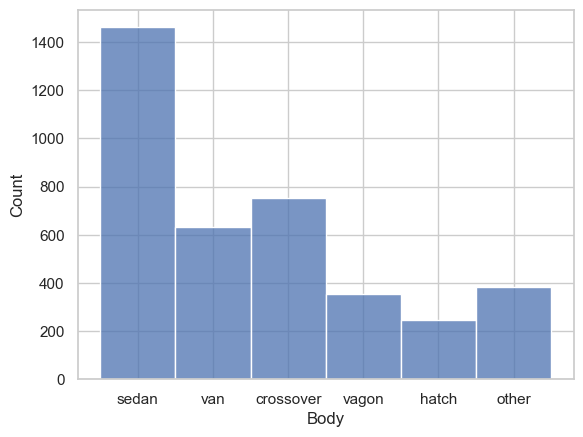

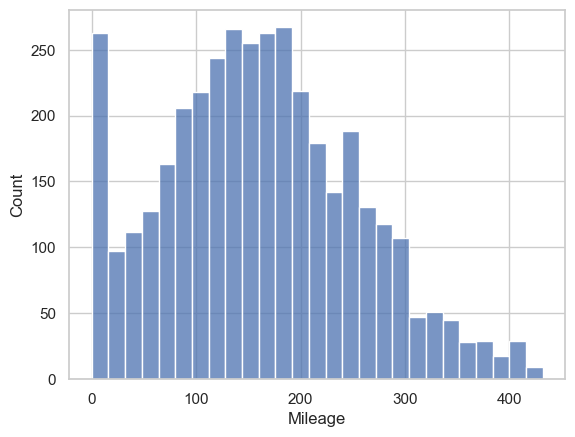

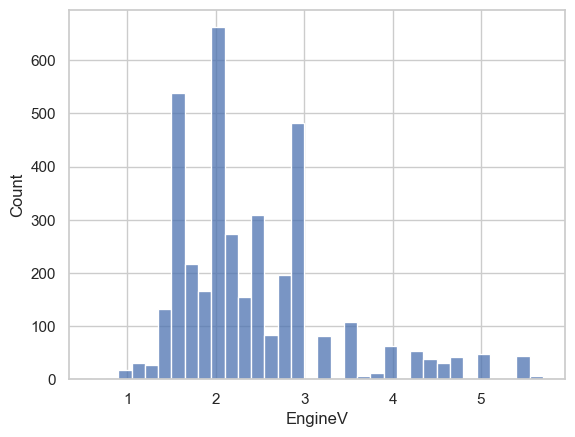

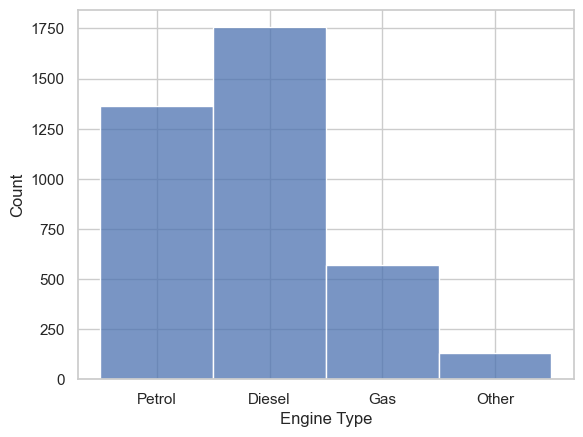

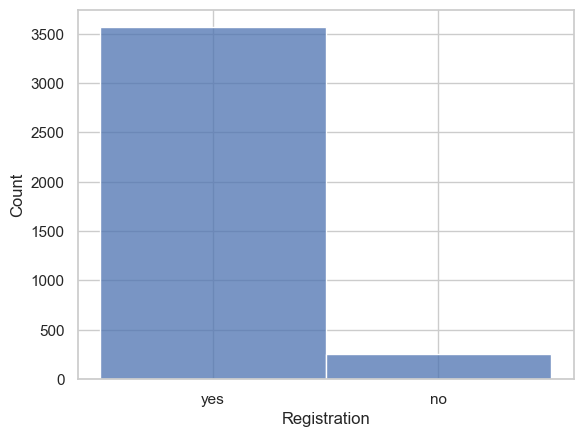

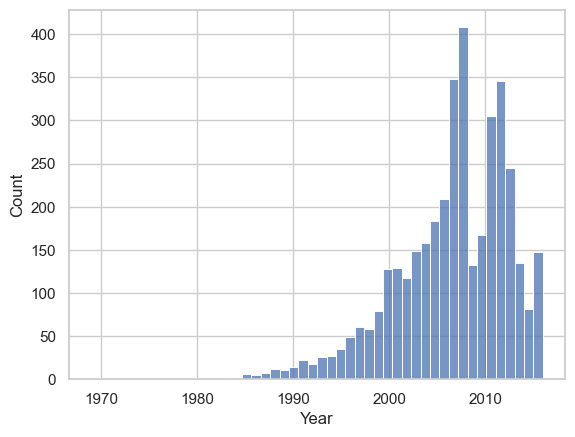

In [22]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 1. Basic Distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
d=data[0:0]
print(d)
for dl in d:
    if dl!="Model":
        sns.histplot(data[dl])
        plt.show()

In [23]:
data["Year"].value_counts()

Year
2008    408
2007    348
2012    346
2011    305
2013    245
2006    209
2005    184
2010    167
2004    158
2003    149
2016    148
2014    135
2009    132
2001    129
2000    128
2002    117
2015     81
1999     79
1997     60
1998     58
1996     49
1995     35
1994     27
1993     26
1991     22
1992     18
1990     14
1988     12
1989     11
1987      7
1985      6
1986      5
1969      1
1979      1
1983      1
1980      1
Name: count, dtype: int64

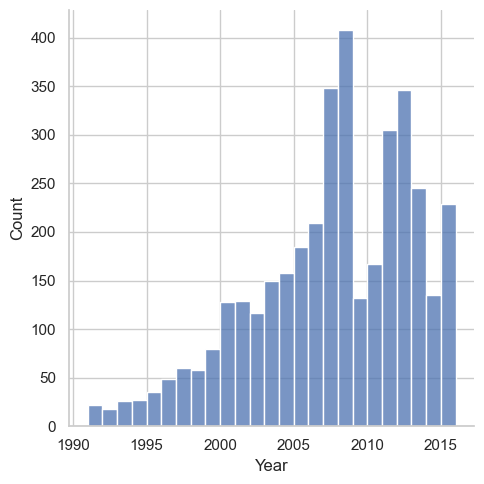

In [24]:
data=data[data["Year"]>1990]
sns.displot(data["Year"])

Empty DataFrame
Columns: [Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model]
Index: []


<Figure size 1000x600 with 0 Axes>

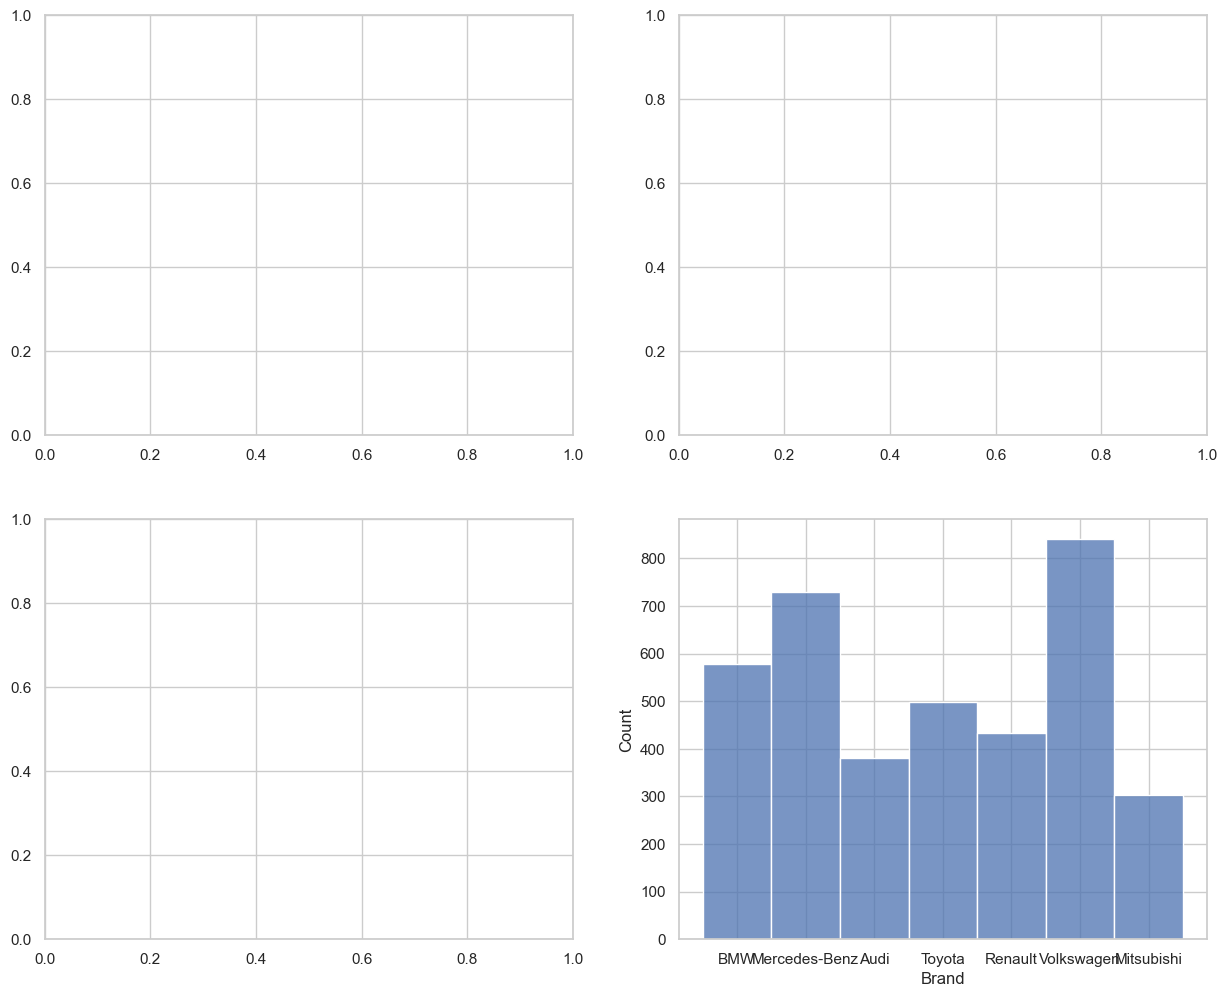

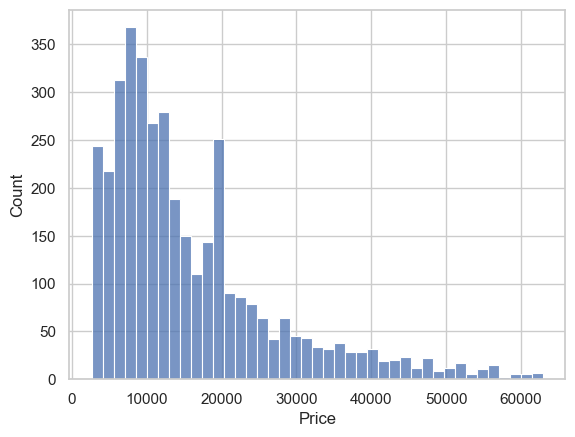

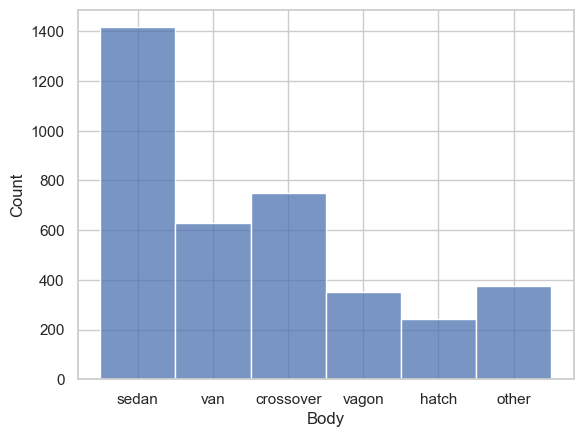

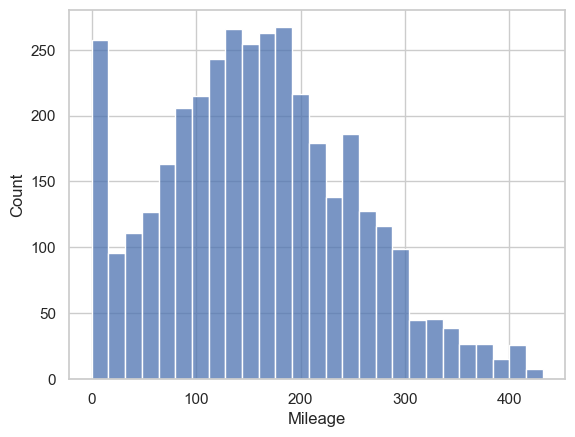

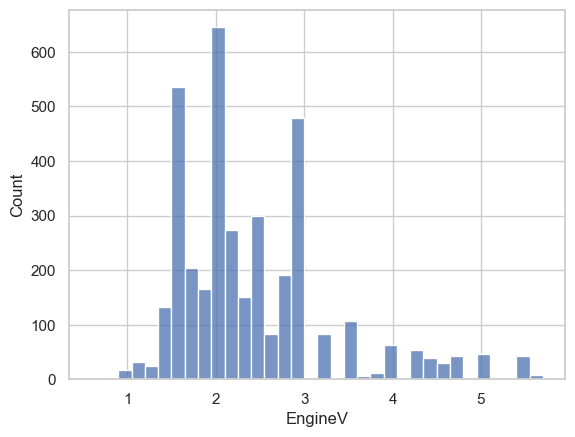

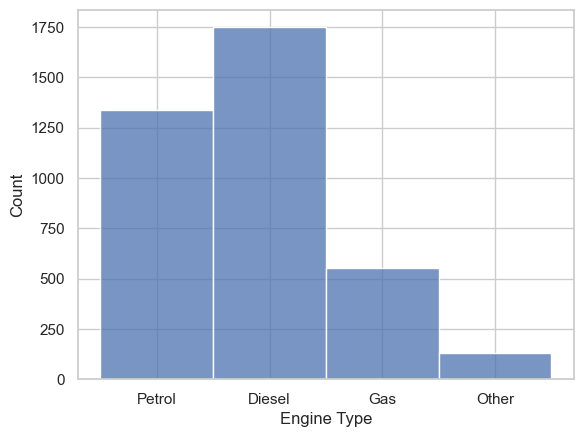

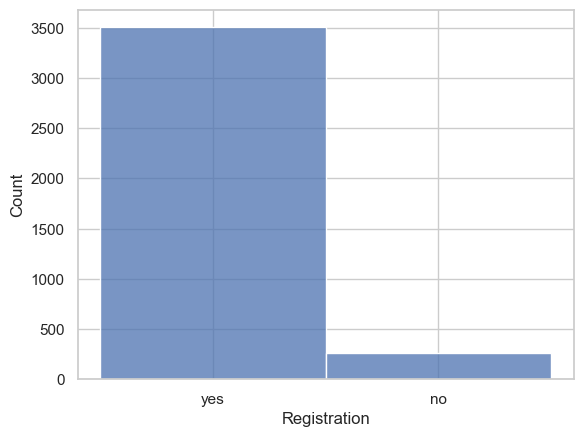

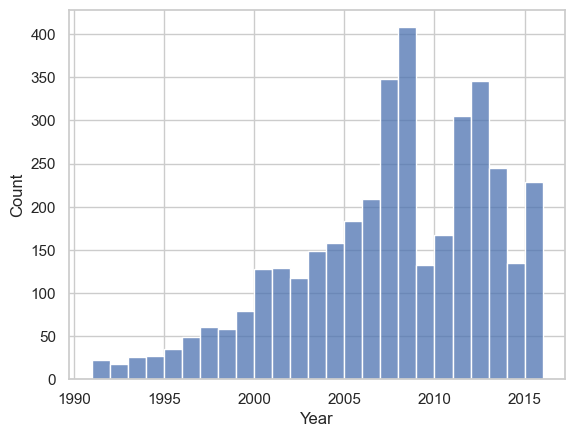

In [25]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 1. Basic Distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
d=data[0:0]
print(d)
for dl in d:
    if dl!="Model":
        sns.histplot(data[dl])
        plt.show()

In [26]:
data_cleaned =  data.reset_index(drop=True)

In [27]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3763,3763.000000,3763,3763.000000,3763.000000,3763,3763,3763.000000,3763
unique,7,NaN,6,NaN,NaN,4,2,NaN,275
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,840,NaN,1416,NaN,NaN,1748,3507,NaN,176
mean,NaN,15817.361295,NaN,159.364337,2.436156,NaN,NaN,2007.150412,NaN
std,NaN,11504.735741,NaN,91.833705,0.885450,NaN,NaN,5.484182,NaN
min,NaN,2650.000000,NaN,0.000000,0.600000,NaN,NaN,1991.000000,NaN
25%,NaN,7800.000000,NaN,95.000000,1.800000,NaN,NaN,2004.000000,NaN
50%,NaN,12000.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,19500.000000,NaN,220.000000,3.000000,NaN,NaN,2012.000000,NaN


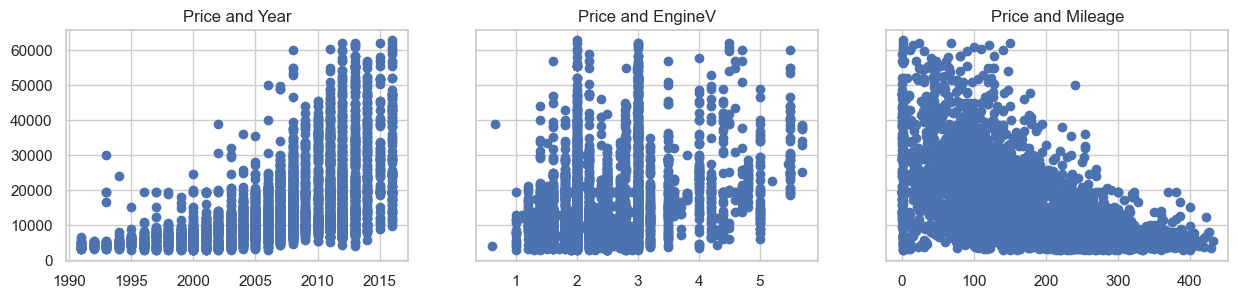

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [29]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price

In [63]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


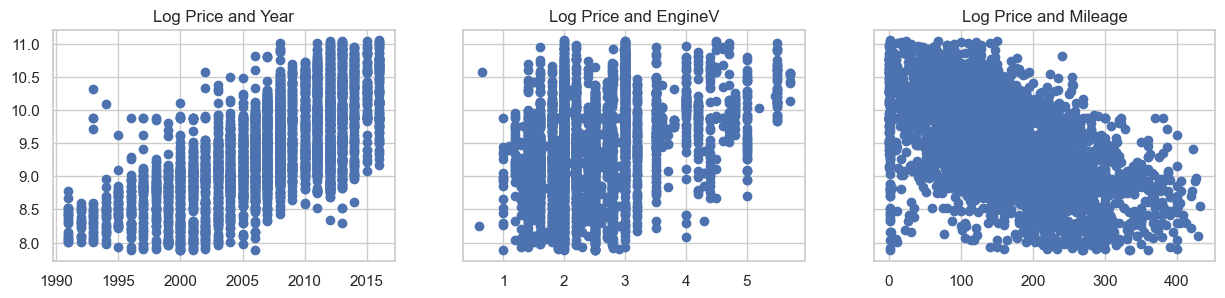

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [31]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.003695,Mileage
1,10.930796,Year
2,8.598962,EngineV


In [33]:
data = data_cleaned.drop(['Year'],axis=1)

In [34]:
data =pd.get_dummies(data, drop_first=True)

In [64]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


In [39]:
data.columns

Index(['log_price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [40]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data= data[cols]

In [70]:
targets = data['log_price']
# targets.describe()

inputs = data.drop(['log_price'],axis=1)
# inputs

In [44]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
print(inputs_scaled[0])

[ 1.28113416 -0.49264701  2.34502376 -0.49018044 -0.2959261  -0.36059677
 -0.3905468  -0.53607461 -0.26158561 -0.33269321  1.28743383 -0.32073699
 -0.44842527 -0.41417896 -0.18840933  1.34860172  0.27017932]


In [81]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Spliting the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.3, random_state=365)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2634, 17)
(1129, 17)
(2634,)
(1129,)


In [82]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [83]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)

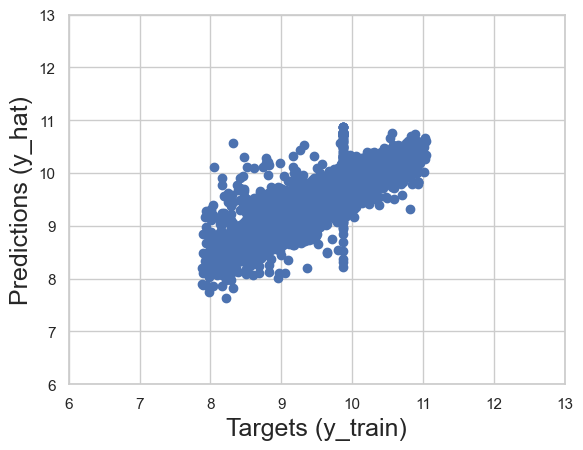

In [84]:
# Comparing the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

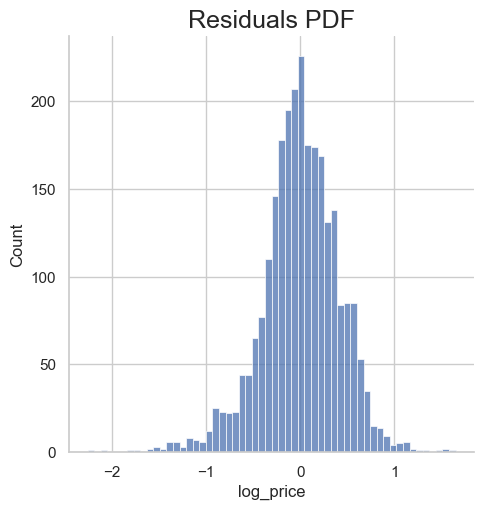

In [85]:
sns.displot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [87]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents)

Score:  0.6369240740709036
Intercept:  9.436060999843637
Coefficents:  [-0.34774542  0.14735125  0.00733245 -0.01287625 -0.1284193  -0.17457065
 -0.04734177 -0.07982592 -0.11599202 -0.07363507 -0.16761326 -0.09576877
 -0.13963079 -0.08304109 -0.02862082 -0.11001952  0.2232358 ]


In [51]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.347745
1,EngineV,0.147351
2,Brand_BMW,0.007332
3,Brand_Mercedes-Benz,-0.012876
4,Brand_Mitsubishi,-0.128419
5,Brand_Renault,-0.174571
6,Brand_Toyota,-0.047342
7,Brand_Volkswagen,-0.079826
8,Body_hatch,-0.115992
9,Body_other,-0.073635


In [53]:
y_hat_test = reg.predict(x_test)

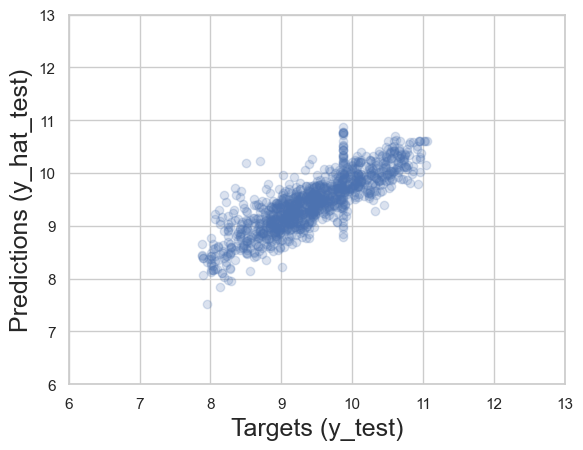

In [54]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [55]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

In [56]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,9037.209907,NaN
1,21291.430843,7900.0
2,16176.280524,NaN
3,15604.339091,NaN
4,16756.684338,NaN
...,...,...
1124,13054.141945,NaN
1125,8026.457079,NaN
1126,17930.986825,NaN
1127,19722.969262,NaN


In [57]:
y_test = y_test.reset_index(drop=True)

In [58]:
df_pf['Target'] = np.exp(y_test)

In [59]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [60]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,9037.209907,5200.0,-3837.209907,73.792498
1,21291.430843,19500.0,-1791.430843,9.186825
2,16176.280524,18400.0,2223.719476,12.085432
3,15604.339091,33700.0,18095.660909,53.696323
4,16756.684338,12850.0,-3906.684338,30.402213
...,...,...,...,...
1124,13054.141945,12000.0,-1054.141945,8.784516
1125,8026.457079,8000.0,-26.457079,0.330713
1126,17930.986825,22800.0,4869.013175,21.355321
1127,19722.969262,19400.0,-322.969262,1.664790


In [88]:
df_pf["Difference%"].describe()

count    1129.000000
mean       32.324718
std        37.086073
min         0.206639
25%        11.503707
50%        23.212770
75%        39.897140
max       443.231400
Name: Difference%, dtype: float64